# Production, degradation and equilibration. 

Here, we will explore the processes of production and degradation of a molecule. We will model this using Ordinary Differential Equations, and we will see how the processes of production and degradation must be balanced in order for a system be able to reach an equilibrium. 

## Technical preamble
The document that you are reading allows for execution of code. We authors will make heavy use of this. But since we are not trying to teach you programming, but rather systems biology, we will try to hide that code as much as possible from you. 

However, in order for our examples to run, we need to set up the system. This we do here, in the technical preamble. You do not have to understand what that code is doing, you just need to excecute it.

To run the preamble, mark the code cell below and press Ctrl+Enter

In [25]:
using DifferentialEquations
using Interact
using Plots
using Latexify
plot(x->x); ## Force pre-compile the plot tool.

plot_sim(ode::ProductionDemoType, args...) = plot_sim(ode, args...; ylims=(0., 10.), xlims=(0., 10.))
function plot_sim(ode, u0, p; ylims=(0., Inf), xlims=(0., Inf))
    prob = ODEProblem(ode, u0, (0.,10.), p)
    sol = solve(prob, Tsit5())
    plot(sol; ylabel="Concentration", xlabel="Time", ylims=ylims, xlims=xlims)
end

function iplot(ode; kwargs...)
    display(latexify(ode))
    n_params = length(ode.params)
    n_vars = length(ode.syms)
    params = [vselection_slider(signif.(logspace(-3,3,201),3), label=latexify(p)) for p in ode.params]
    u0 = [vselection_slider(signif.([0.; logspace(-3,3,201)],3), value=0., label=latexify("$(p)_0")) for p in ode.syms]
    display(hbox(params..., u0...))
    foreach((x...) -> plot_sim(ode, collect(x[1:n_vars]), collect(x[n_vars+1:end]); kwargs...),
        signal.(u0)..., signal.(params)...
    )
end

iplot (generic function with 2 methods)

## The simplest model of production
The simples way to model production would be to say that we have some molecular factory which churns out a molecule at a constant rate. If that rate is $1$ molecule/second, then every second, a new molecule would be created. Simple. 

We will now try our hands on a bit of computational modelling. We will be using something called a Domain-Specific Language. The DSL that we will be using is a language which allows you to input chemical reactions in an arrow notation. 

To model a simple production using this language, we enter:


In [26]:
production = @reaction_network ProductionDemoType begin
    p, 0 → x
end p

(::ProductionDemoType) (generic function with 2 methods)

We will pick this language apart later, but for now, let's be content with saying that the species $x$ is being produced (out of thin air) at a rate $p$.

We can simulate this model to see what happens to the concentration of $x$ over time. To do so, we have created a function called `iplot`. By passing the model as an argument to this function, we can plot the concentration over time and also use interactive sliders to update the value of the parameter $p$ as well as the initial concentration of $x$.

Click on the next cell and press Ctrl+Enter.

L"\begin{align}
\frac{dx}{dt} =& p \\ 
\end{align}
"

Interact.Box(Interact.Layout(Interact.Box(#= circular reference @-2 =#)), false, Interact.Widget[Interact.Options{:SelectionSlider,Float64}(65: "input-23" = 1.0 Float64 , L"$p$", 1.0, "1.0", 101, Interact.OptionDict(DataStructures.OrderedDict("0.001"=>0.001,"0.00107"=>0.00107,"0.00115"=>0.00115,"0.00123"=>0.00123,"0.00132"=>0.00132,"0.00141"=>0.00141,"0.00151"=>0.00151,"0.00162"=>0.00162,"0.00174"=>0.00174,"0.00186"=>0.00186…), Dict(0.00132=>"0.00132",0.117=>"0.117",288.0=>"288.0",0.0631=>"0.0631",708.0=>"708.0",1000.0=>"1000.0",36.3=>"36.3",0.617=>"0.617",77.6=>"77.6",83.2=>"83.2"…)), Any[], Any[], true, "vertical", true), Interact.Options{:SelectionSlider,Float64}(67: "input-24" = 0.0 Float64 , L"$x_{0}$", 0.0, "0.0", 1, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.001"=>0.001,"0.00107"=>0.00107,"0.00115"=>0.00115,"0.00123"=>0.00123,"0.00132"=>0.00132,"0.00141"=>0.00141,"0.00151"=>0.00151,"0.00162"=>0.00162,"0.00174"=>0.00174…), Dict(0.00132=>"0.00132",0.117=>"0.117",288.0=>"288.0",0.0631=>"0.0631",708.0=>"708.0",1000.0=>"1000.0",36.3=>"36.3",0.617=>"0.617",77.6=>"77.6",83.2=>"83.2"…)), Any[], Any[], true, "vertical", true)])

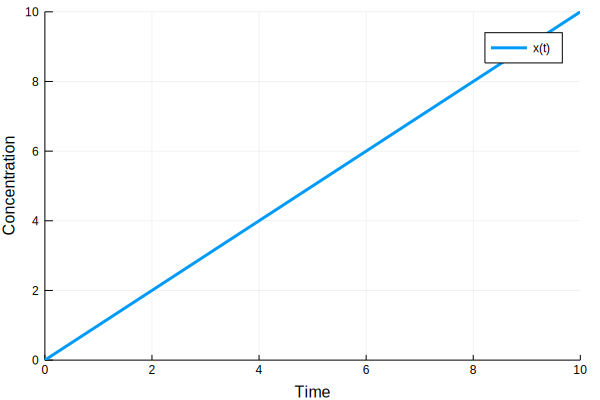

In [27]:
iplot(production)

Here, we see that the concentration of $x$ increases linearly over time. We also see that the production parameter, $p$, determines the slope of the curve. 

So, for any given interval of time, $\Delta t$, we increase the concentration of $x$ by $\Delta t \cdot p$. 

## The simplest form of degradation (?)

In [28]:
degradation = @reaction_network DegradationDemo begin
     d, x → 0 
end d

(::DegradationDemo) (generic function with 2 methods)

L"\begin{align}
\frac{dx}{dt} =& - d \cdot x \\ 
\end{align}
"

Interact.Box(Interact.Layout(Interact.Box(#= circular reference @-2 =#)), false, Interact.Widget[Interact.Options{:SelectionSlider,Float64}(71: "input-25" = 1.0 Float64 , L"$d$", 1.0, "1.0", 101, Interact.OptionDict(DataStructures.OrderedDict("0.001"=>0.001,"0.00107"=>0.00107,"0.00115"=>0.00115,"0.00123"=>0.00123,"0.00132"=>0.00132,"0.00141"=>0.00141,"0.00151"=>0.00151,"0.00162"=>0.00162,"0.00174"=>0.00174,"0.00186"=>0.00186…), Dict(0.00132=>"0.00132",0.117=>"0.117",288.0=>"288.0",0.0631=>"0.0631",708.0=>"708.0",1000.0=>"1000.0",36.3=>"36.3",0.617=>"0.617",77.6=>"77.6",83.2=>"83.2"…)), Any[], Any[], true, "vertical", true), Interact.Options{:SelectionSlider,Float64}(73: "input-26" = 0.0 Float64 , L"$x_{0}$", 0.0, "0.0", 1, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.001"=>0.001,"0.00107"=>0.00107,"0.00115"=>0.00115,"0.00123"=>0.00123,"0.00132"=>0.00132,"0.00141"=>0.00141,"0.00151"=>0.00151,"0.00162"=>0.00162,"0.00174"=>0.00174…), Dict(0.00132=>"0.00132",0.117=>"0.117",288.0=>"288.0",0.0631=>"0.0631",708.0=>"708.0",1000.0=>"1000.0",36.3=>"36.3",0.617=>"0.617",77.6=>"77.6",83.2=>"83.2"…)), Any[], Any[], true, "vertical", true)])

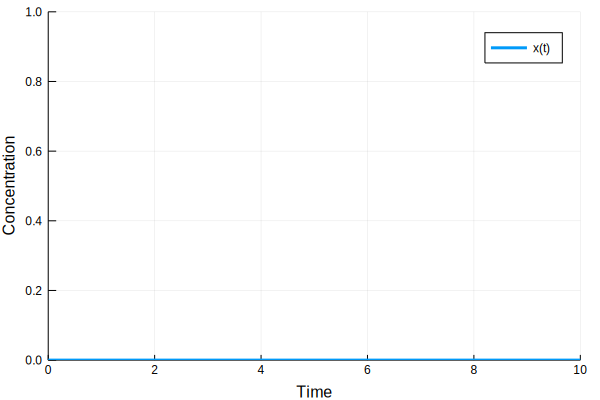

In [29]:
iplot(degradation)

## Balancing production and degradation

In [30]:
prodDeg = @reaction_network ProdDegDemo begin
    p, 0 → x
    d, x → 0 
end p d

(::ProdDegDemo) (generic function with 2 methods)

L"\begin{align}
\frac{dx}{dt} =& p - d \cdot x \\ 
\end{align}
"

Interact.Box(Interact.Layout(Interact.Box(#= circular reference @-2 =#)), false, Interact.Widget[Interact.Options{:SelectionSlider,Float64}(77: "input-27" = 1.0 Float64 , L"$p$", 1.0, "1.0", 101, Interact.OptionDict(DataStructures.OrderedDict("0.001"=>0.001,"0.00107"=>0.00107,"0.00115"=>0.00115,"0.00123"=>0.00123,"0.00132"=>0.00132,"0.00141"=>0.00141,"0.00151"=>0.00151,"0.00162"=>0.00162,"0.00174"=>0.00174,"0.00186"=>0.00186…), Dict(0.00132=>"0.00132",0.117=>"0.117",288.0=>"288.0",0.0631=>"0.0631",708.0=>"708.0",1000.0=>"1000.0",36.3=>"36.3",0.617=>"0.617",77.6=>"77.6",83.2=>"83.2"…)), Any[], Any[], true, "vertical", true), Interact.Options{:SelectionSlider,Float64}(79: "input-28" = 1.0 Float64 , L"$d$", 1.0, "1.0", 101, Interact.OptionDict(DataStructures.OrderedDict("0.001"=>0.001,"0.00107"=>0.00107,"0.00115"=>0.00115,"0.00123"=>0.00123,"0.00132"=>0.00132,"0.00141"=>0.00141,"0.00151"=>0.00151,"0.00162"=>0.00162,"0.00174"=>0.00174,"0.00186"=>0.00186…), Dict(0.00132=>"0.00132",0.117=>"0.117",288.0=>"288.0",0.0631=>"0.0631",708.0=>"708.0",1000.0=>"1000.0",36.3=>"36.3",0.617=>"0.617",77.6=>"77.6",83.2=>"83.2"…)), Any[], Any[], true, "vertical", true), Interact.Options{:SelectionSlider,Float64}(81: "input-29" = 0.0 Float64 , L"$x_{0}$", 0.0, "0.0", 1, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.001"=>0.001,"0.00107"=>0.00107,"0.00115"=>0.00115,"0.00123"=>0.00123,"0.00132"=>0.00132,"0.00141"=>0.00141,"0.00151"=>0.00151,"0.00162"=>0.00162,"0.00174"=>0.00174…), Dict(0.00132=>"0.00132",0.117=>"0.117",288.0=>"288.0",0.0631=>"0.0631",708.0=>"708.0",1000.0=>"1000.0",36.3=>"36.3",0.617=>"0.617",77.6=>"77.6",83.2=>"83.2"…)), Any[], Any[], true, "vertical", true)])

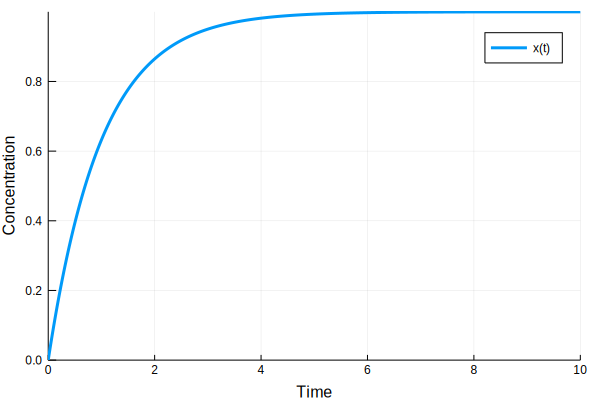

In [31]:
iplot(prodDeg)